In [1]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [2]:
call_data = pd.read_csv("data/call_data_from_CAD.csv")

In [3]:
call_data.head()

,Unnamed: 0,IncidentNumber,Call_Created_Time,Call_First_Dispatched_Time,Call_First_On_Scene,Call_Cleared,Call_Zipcode,Beat,Call_Source,Call_Priority,InitialIncidentTypeDescription,IsPrimary,PrimaryUnitCallSign,RespondingUnitCallSign,Unit_Dispatched_Time,Unit_OnScene_Time,Unit_Cleared_Time,Disposition
0,1,OR-2016-01-01-16000001,1/1/16 0:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,1,5E57,5E57,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,ADVISED
1,2,OR-2016-01-01-16000001,1/1/16 0:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,0,5E57,4X40,1/1/16 0:09,1/1/16 0:09,1/1/16 0:46,ADVISED
2,3,OR-2016-01-01-16000001,1/1/16 0:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,0,5E57,4E53,1/1/16 0:04,1/1/16 0:12,1/1/16 0:51,ADVISED
3,4,OR-2016-01-01-16000003,1/1/16 0:00,1/1/16 0:00,1/1/16 0:00,1/1/16 0:02,97401.0,EP02,SELF,6,TRAFFIC STOP,1,5T81,5T81,1/1/16 0:00,1/1/16 0:00,1/1/16 0:02,ADVISED
4,5,OR-2016-01-01-16000004,1/1/16 0:02,1/1/16 0:04,1/1/16 0:04,1/1/16 0:18,97401.0,EP02,E911,3,CHECK WELFARE,0,3X90,3F61,1/1/16 0:04,NaN,1/1/16 0:08,ASSISTED


In [4]:
pattern = r"\b(1J77|3J79|3J78|3J77|4J79|3J81|3J76|2J28|2J29|CAHOOT|CAHOT|CAHO)\b"

def unit_call_sign(call_sign):
    if pd.isna(call_sign):
        return "unknown"
    elif re.fullmatch(pattern, call_sign):
        return "cahoots"
    else:
        return "police"

call_data["call_unit"] = call_data["PrimaryUnitCallSign"].apply(unit_call_sign)
call_data["responding_unit"] = call_data["PrimaryUnitCallSign"].fillna("").apply(
    lambda x: "cahoots" if re.fullmatch(pattern, x) else "police"
)

In [5]:
call_data.head()

,Unnamed: 0,IncidentNumber,Call_Created_Time,Call_First_Dispatched_Time,Call_First_On_Scene,Call_Cleared,Call_Zipcode,Beat,Call_Source,Call_Priority,InitialIncidentTypeDescription,IsPrimary,PrimaryUnitCallSign,RespondingUnitCallSign,Unit_Dispatched_Time,Unit_OnScene_Time,Unit_Cleared_Time,Disposition,call_unit,responding_unit
0,1,OR-2016-01-01-16000001,1/1/16 0:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,1,5E57,5E57,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,ADVISED,police,police
1,2,OR-2016-01-01-16000001,1/1/16 0:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,0,5E57,4X40,1/1/16 0:09,1/1/16 0:09,1/1/16 0:46,ADVISED,police,police
2,3,OR-2016-01-01-16000001,1/1/16 0:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,0,5E57,4E53,1/1/16 0:04,1/1/16 0:12,1/1/16 0:51,ADVISED,police,police
3,4,OR-2016-01-01-16000003,1/1/16 0:00,1/1/16 0:00,1/1/16 0:00,1/1/16 0:02,97401.0,EP02,SELF,6,TRAFFIC STOP,1,5T81,5T81,1/1/16 0:00,1/1/16 0:00,1/1/16 0:02,ADVISED,police,police
4,5,OR-2016-01-01-16000004,1/1/16 0:02,1/1/16 0:04,1/1/16 0:04,1/1/16 0:18,97401.0,EP02,E911,3,CHECK WELFARE,0,3X90,3F61,1/1/16 0:04,NaN,1/1/16 0:08,ASSISTED,police,police


In [6]:
call_data = call_data.drop(["Call_Created_Time", "Call_First_Dispatched_Time", "Call_First_On_Scene", "Call_Cleared", "Beat", 
                "Call_Source", "IsPrimary", "PrimaryUnitCallSign", "RespondingUnitCallSign", "Unit_Dispatched_Time",
                "Unit_OnScene_Time", "Unit_Cleared_Time"], axis=1)

In [7]:
call_data = call_data[call_data["responding_unit"] == "cahoots"]

In [8]:
#call_data["Call_Zipcode"].isna().sum()
#call_data.isna().sum()
call_data = call_data.dropna()

In [9]:
#call_data["Call_Zipcode"].unique()

In [10]:
call_data["Call_Zipcode"] = call_data["Call_Zipcode"].astype(int)
call_data.head()

,Unnamed: 0,IncidentNumber,Call_Zipcode,Call_Priority,InitialIncidentTypeDescription,Disposition,call_unit,responding_unit
18,19,OR-2016-01-01-16000016,97402,7,TRANSPORT,DISREGARD,cahoots,cahoots
27,28,OR-2016-01-01-16000033,97402,7,TRANSPORT,DISREGARDED BY DISPATCH,cahoots,cahoots
43,44,OR-2016-01-01-16000044,97402,7,INTOXICATED SUBJECT,UNABLE TO LOCATE,cahoots,cahoots
63,64,OR-2016-01-01-16000069,97401,7,ASSIST PUBLIC- POLICE,DISREGARDED BY DISPATCH,cahoots,cahoots
151,152,OR-2016-01-01-16000148,97402,7,ASSIST PUBLIC- POLICE,GONE ON ARRIVAL,cahoots,cahoots


In [11]:
#call_data["Call_Zipcode"].unique()

In [12]:
Eugene_zips = {97401, 97402, 97403, 97404, 97405, 97408, 97455, 97412, 97448, 97437, 97419}
Springfield_zips = {97477, 97478, 97424}

def eugene_or_springfield(zipcode):
    if zipcode in Eugene_zips:
        return "Eugene"
    elif zipcode in Springfield_zips:
        return "Springfield"
    else:
        return "Other"

In [13]:
call_data["call_city"] = call_data["Call_Zipcode"].apply(eugene_or_springfield)

In [14]:
call_data["call_city"]

18         Eugene
27         Eugene
43         Eugene
63         Eugene
151        Eugene
            ...  
1048517    Eugene
1048518    Eugene
1048519    Eugene
1048542    Eugene
1048554    Eugene
Name: call_city, Length: 79958, dtype: object

In [15]:
race_ethnicity_data = pd.read_csv("data/race_and_ethnicity_data.csv", header = [1, 2])
race_ethnicity_data.columns = [f"{a}_{b}" if "Unnamed" not in str(a) else b.lower() for a, b in race_ethnicity_data.columns]
race_ethnicity_data.head()

,unnamed: 0_level_1,United States_Value,error,Oregon_Value,error,"Lane County, OR_Value",error,"Eugene-Springfield, OR Metro Area_Value",error,97324_Value,...,97489_Value,error,97490_Value,error,97492_Value,error,97493_Value,error,97498_Value,error
0,Total:,332387550,NaN,4238714,NaN,382628,NaN,382628,NaN,1129,...,896,359,476,288,1058,505,466,128,2141,324
1,Not Hispanic or Latino:,269255940,1579.0,3633247,NaN,343584,NaN,343584,NaN,1129,...,700,224,467,286,1036,503,466,128,2000,316
2,White alone,193338270,30069.0,3065611,3460.0,301961,795.0,301961,795.0,999,...,658,220,389,244,1007,497,430,114,1797,266
3,Black or African American alone,39981608,43649.0,77800,1828.0,4060,373.0,4060,373.0,0,...,0,13,0,13,5,9,0,13,5,7
4,American Indian and Alaska Native alone,1751338,8345.0,28235,1397.0,2532,408.0,2532,408.0,4,...,0,13,0,13,22,36,0,13,0,13


In [16]:
sex_age_data = pd.read_csv("data/sex_and_age_data.csv", header = [1, 2])
sex_age_data.columns = [f"{a}_{b}" if "Unnamed" not in str(a) else b.lower() for a, b in sex_age_data.columns]
sex_age_data.head()

,unnamed: 0_level_1,United States_Value,error,Oregon_Value,error,"Lane County, OR_Value",error,"Eugene-Springfield, OR Metro Area_Value",error,97324_Value,...,97489_Value,error,97490_Value,error,97492_Value,error,97493_Value,error,97498_Value,error
0,Total:,332387550,NaN,4238714,NaN,382628,NaN,382628,NaN,1129,...,896,359,476,288,1058,505,466,128,2141,324
1,Male:,164545090,6966.0,2113849,981.0,189067,65.0,189067,65.0,584,...,507,205,266,177,570,273,230,66,969,178
2,Under 5 years,9688436,4185.0,109030,503.0,8618,25.0,8618,25.0,10,...,0,13,14,21,45,76,0,13,3,11
3,5 to 9 years,10296243,22450.0,121246,1925.0,9771,644.0,9771,644.0,14,...,0,13,6,9,4,7,0,13,79,62
4,10 to 14 years,11032019,22077.0,131064,1956.0,10360,643.0,10360,643.0,19,...,79,74,9,17,38,44,20,31,65,49


In [17]:
education_data = pd.read_csv("data/education_by_sex_data.csv")
education_data.head()

,B15002,Sex by Educational Attainment for the Population 25 Years and Over,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86
0,NaN,United States,NaN,Oregon,NaN,"Lane County, OR",NaN,"Eugene-Springfield, OR Metro Area",NaN,97324,...,97489,NaN,97490,NaN,97492,NaN,97493,NaN,97498,NaN
1,NaN,Value,Error,Value,Error,Value,Error,Value,Error,Value,...,Value,Error,Value,Error,Value,Error,Value,Error,Value,Error
2,Total:,228434660,11047,3021010,716,266887,50,266887,50,938,...,656,220,343,214,835,452,362,110,1687,238
3,Male:,111381464,7804,1489634,774,130479,43,130479,43,503,...,343,130,189,114,433,245,204,70,734,119
4,No schooling completed,2122372,17274,22196,1308,1304,290,1304,290,0,...,0,13,0,13,1,3,0,13,8,13


In [18]:
veteran_data = pd.read_csv("data/veteran_status_data.csv")
veteran_data.head()

,Unnamed: 0,97324,Unnamed: 2,97390,Unnamed: 4,97401,Unnamed: 6,97402,Unnamed: 8,97403,...,97489,Unnamed: 70,97490,Unnamed: 72,97492,Unnamed: 74,97493,Unnamed: 76,97498,Unnamed: 78
0,value,Value,Error,Value,Error,Value,Error,Value,Error,Value,...,Value,Error,Value,Error,Value,Error,Value,Error,Value,Error
1,Total:,72,37,103,76,2206,370,3398,492,295,...,147,87,46,32,229,211,43,32,258,81
2,"Gulf War (9/2001 or later), no Gulf War (8/199...",7,8,0,13,258,135,663,177,38,...,0,13,18,22,0,13,0,13,10,12
3,Gulf War (9/2001 or later) and Gulf War (8/199...,0,13,0,13,51,49,198,100,4,...,16,25,0,13,0,13,0,13,0,13
4,"Gulf War (9/2001 or later), and Gulf War (8/19...",0,13,0,13,0,28,0,31,0,...,0,13,0,13,0,13,0,13,0,13


In [147]:
call_data["Call_Priority"].unique()

array(['7', 'P', '5', '3', '6', '1', '4', '8', '2', '9'], dtype=object)

<Axes: xlabel='Call_Priority', ylabel='Count'>

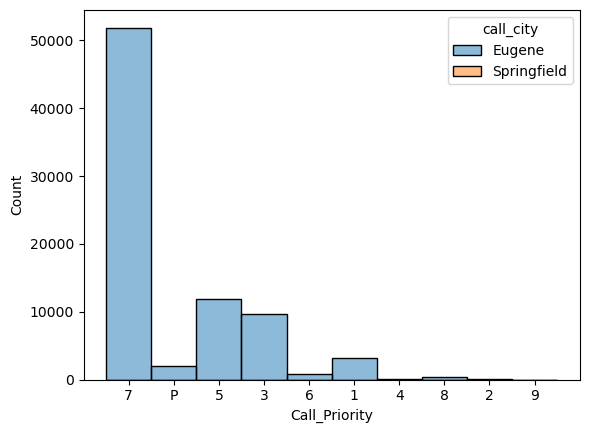

In [149]:
sns.histplot(call_data, x = "Call_Priority", hue = "call_city")